In [2]:
import corner
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
mpl.style.use('seaborn-v0_8')

/home/carlisle/anaconda3/envs/myenv/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:84: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  dispatcher = jit(_target='npyufunc',


In [3]:
mv5_samples = np.vstack(np.loadtxt("mv5/plainLHS/mv5_500d_100w_allsamples.txt", unpack = True)).T 
# put 2nd element of mv5 samples to last element
mv5_samples = np.insert(mv5_samples, 5, mv5_samples[:, 1], axis = 1)
mv5_samples = np.delete(mv5_samples, 1, axis = 1)
param_names = [r"$Q_{s0}^{2}$ (GeV²)",
               r"$e_c$",
               r"$C^{2}$",
               r"$\sigma_0/2$ (mb)",
               r"$\gamma$",] # ordered
mve_samples = np.vstack(np.loadtxt("mve/plainLHS/mve_all500d_100w_allsamples.txt", unpack = True)).T 
mve_gamma = 1.5*np.ones(len(mve_samples))
# insert mve_gamma into mve_samples at second elements
mve_samples = np.insert(mve_samples, 4, mve_gamma, axis = 1)
mve_samples[0:200, 4] = 1.499
# reverse order of paramnames
param_names_rev = param_names[::-1]
# reverse order of mve_samples
mve_samples_rev = mve_samples[:, ::-1]

n_params = len(param_names)
l_bounds = [0.001, 0.5, 0.1, 5.0, 0.5] # Qs0² , gamma, ec , C², sigma0/2
u_bounds = [0.2, 40.0, 40.0, 30.0, 2.0]
mylimits = np.column_stack((l_bounds, u_bounds))
l_bounds_mve = [0.001, 0.5, 0.1, 5.0, 1.4] # Qs0² , gamma, ec , C², sigma0/2
u_bounds_mve = [0.2, 40.0, 40.0, 30.0, 1.5]
mylimits_mve = np.column_stack((l_bounds_mve, u_bounds_mve))
mylimits_rev = np.array([l_bounds[::-1], u_bounds[::-1]])
nsamples = len(mv5_samples)
initial_guess = [0.06, 18.9, 7.2, 16.36, 1.0]

In [4]:
median_mv5 = np.median(mv5_samples, axis = 0)
median_mve = np.median(mve_samples, axis = 0)
sdp_mve = np.percentile(mve_samples, 84, axis = 0) - median_mve
sdm_mve = median_mve - np.percentile(mve_samples, 16, axis = 0)
sdp_mv5 = np.percentile(mv5_samples, 84, axis = 0) - median_mv5
sdm_mv5 = median_mv5 - np.percentile(mv5_samples, 16, axis = 0)
median_mve[4] = 1.0
sdp_mve[4] = 0.0
sdm_mve[4] = 0.0

In [5]:
print(sdp_mve)
print(sdm_mve)

[0.00577797 4.00509976 1.91343055 0.71444355 0.        ]
[0.00453391 4.32597539 0.7324233  0.68962066 0.        ]


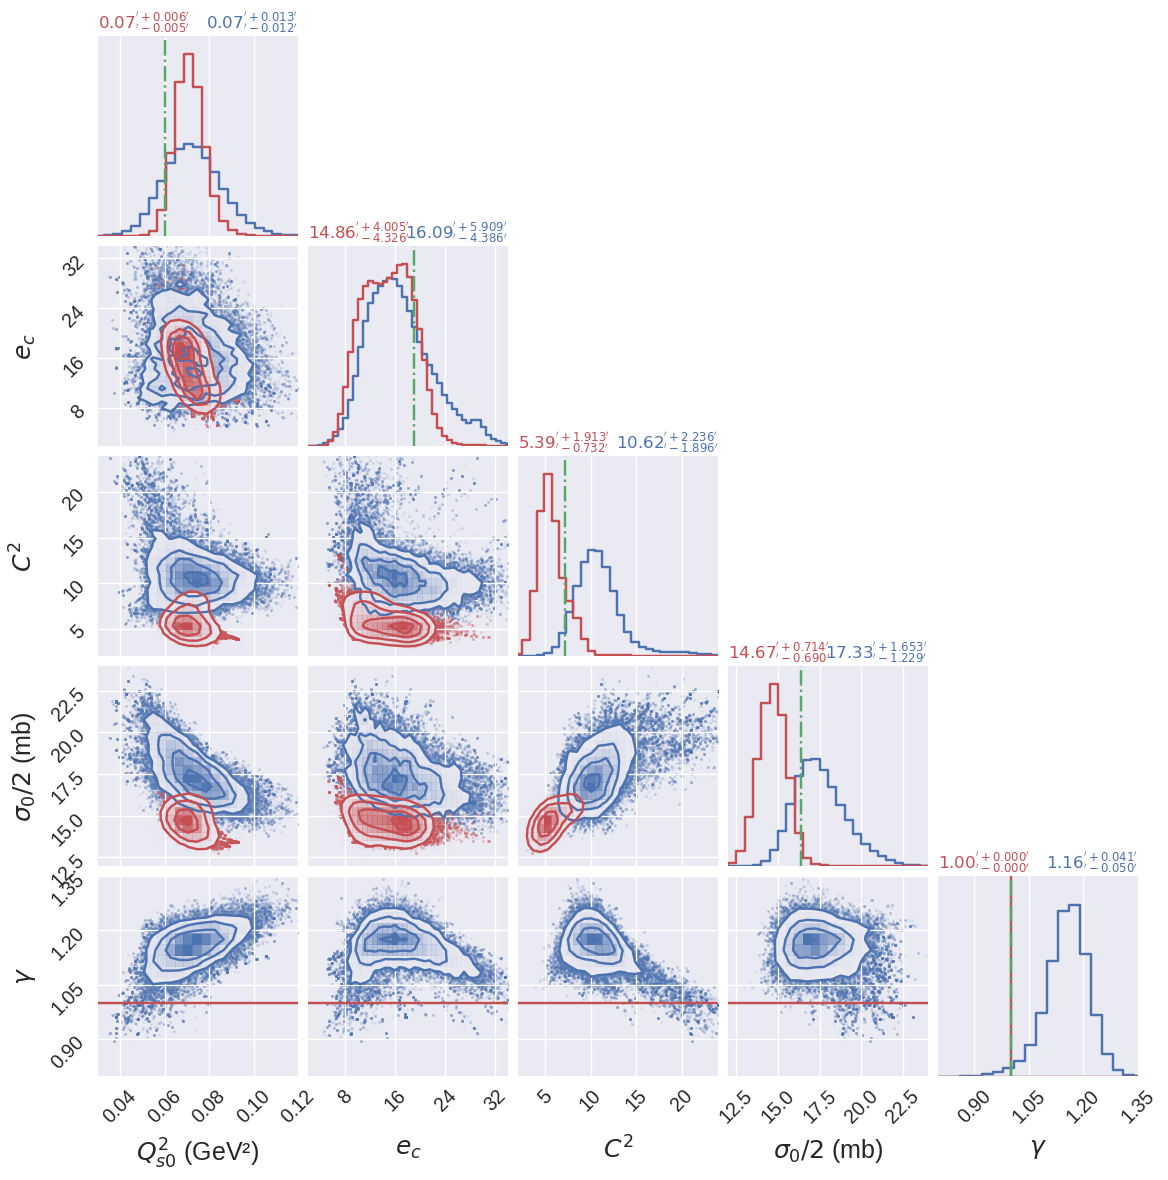

In [16]:
# binning
binning = []
for i in range(n_params):
    bin = np.linspace(l_bounds[i], u_bounds[i], 50)
    binning.append(bin)


figure = corner.corner(
    mv5_samples,
    bins = 50,
    range = mylimits,
    #labels = param_names,
    #plot_contours = True,
    weights= np.ones(nsamples)/nsamples,
    #quantiles=[0.05, 0.5, 0.95],
    #show_titles = True, # 
    #title_fmt = '.3f',
    #title_kwargs={"fontsize": 12, "loc": "center"}, 
    color = 'b',
    smooth1d = True,
    #smooth = True,
    #plot_density = True,
    #plot_datapoints = False,
    #fillcontours = True, # 
    #hist2d_kwargs = {"plot_density": True} # conto
)

ndim = n_params
axes = np.array(figure.axes).reshape((ndim, ndim))
range0 = [0.03, 0.12]
range1 = [2.0, 34.0]
range2 = [2.0, 24.0]
range3 = [12.0, 24.0]#[12.0, 24.0]
range4 = [0.8, 1.35]
xranges = np.array([range0, range1, range2, range3, range4])
yrange0 = [0.0, 0.18]
yrange1 = [0.0, 0.07]
yrange2 = [0.0, 0.22]
yrange3 = [0.0, 0.16]
yrange4 = [0.0, 0.22]
yranges = np.array([yrange0, yrange1, yrange2, yrange3, yrange4])


# for xi in range(ndim-1):
#    for yi in range(xi):
#        ax = axes[xi, yi]
#        ax.hist2d(mve_samples[:,xi], 
#                  mve_samples[:,yi])

# for i in range(ndim - 1):
#     ax = axes[i, i]
#     ax.hist(mve_samples[:,i], 
#             bins = binning[i], 
#             color = 'r',
#             weights = np.ones(nsamples)/nsamples,
#             histtype = 'step',
#             linewidth = 1.5)

corner.corner(mve_samples,
            bins = 50,
            fig = figure,
            range = mylimits,
            labels = param_names,
            weights= np.ones(nsamples)/nsamples,
            #weights = 2*np.ones(len(mve_samples))*len(mv5_samples)/len(mve_samples) ,
            #quantiles=[0.05, 0.5, 0.95],
            #show_titles = True, # 
            #title_fmt = '.3f',
            #title_kwargs={"fontsize": 12, "color": "r", "pad": 40},
            color = 'r',
            smooth1d = True,
            smooth = True,
            plot_density = True,
            #reverse = True,
            plot_datapoints = True,
            fillcontours = False, # 
            hist2d_kwargs = {"plot_density": True} )

ax = axes[4, 4]
ax.set_ylim(0.001, 0.25)
ax.axvline(1.0, color="r")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.label.set_size(18)

for i in range(ndim):
    ax = axes[i, i]
    #show x values in axis label
    #ax.set_ylim(0.001,0.25) #(ranges[i])
    #ax.set_ylim(yranges[i])
    yo = "yo"
    median_mve_string = "{:.2f}".format(median_mve[i])
    up_string = "{}{:.3f}".format('+', sdp_mve[i])
    down_string = "{}{:.3f}".format('-', sdm_mve[i])
    values = ([median_mve_string, {up_string},{down_string}])
    ax.set_title('${}^{}_{}$'.format(*values),
                   color = 'r', 
                   loc = 'left', 
                   fontsize = 12,
                   pad = -5,
                   ) 
    #ax.set_suptitle('/n hello', color = 'g')
    median_mv5_string = "{:.2f}".format(median_mv5[i])
    up_string = "{}{:.3f}".format('+', sdp_mv5[i])
    down_string = "{}{:.3f}".format('-', sdm_mv5[i])
    values = ([median_mv5_string, {up_string},{down_string}])
    #ax.set_title("\n trial text", loc = 'right')
    ax.set_title('${}^{}_{}$'.format(*values), 
                   color = 'b', 
                   loc = 'right', 
                   fontsize = 12,
                   ) 

    #text = ax.text(0.3, 0.5, "row title", size=12)
    ax.set_xlim(xranges[i])
    ax.axvline(initial_guess[i], linestyle = '-.', color = 'g')


for yi in range(ndim):
   for xi in range(yi):
       ax = axes[yi, xi]
       #set x and y label fontsize
       ax.xaxis.label.set_size(18)
       ax.yaxis.label.set_size(18)
       # set x and y tick fontsize
       ax.tick_params(axis='both', which='major', labelsize=14)
       ax.set_ylim(xranges[yi])
       ax.set_xlim(xranges[xi])
   


for xi in range(ndim-1):
    ax = axes[4, xi]
    ax.axhline(1.0, color="r")
    #for yi in range(xi):
    #    ax = axes[yi, xi]
        #ax.set_xticklabels([])
        #ax.set_yticklabels([])
        #ax.set_xlabel([])

In [13]:
figure.savefig("corner_big.png", dpi=300)